# Térinformatikai vizualizáció `Geopandas` segítségével

In [2]:
%matplotlib inline

## Bevezetés a `Shapely` könyvtárba


In [3]:
!pip install shapely

### Pontok (`Point`)

In [4]:
#from shapely import Point
from shapely.geometry import Point
point = Point((10.0, 20.0))

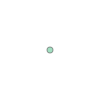

In [ ]:
point

In [5]:
print(point.coords)
print(list(point.coords))
print(point.x, point.y)
print(point.coords[:])

[(10.0, 20.0)]
10.0 20.0
[(10.0, 20.0)]


In [6]:
print('length = ', point.length)
print('area = ', point.area)

length =  0.0
area =  0.0


### Vonalak (`LineString`) és műveleteik

In [7]:
from shapely.geometry import LineString
north_high_street = LineString([(5, 0), (5, 10)])

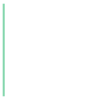

In [8]:
north_high_street

In [9]:
print(north_high_street.coords)
print(list(north_high_street.coords))
print(north_high_street.coords[:])

[(5.0, 0.0), (5.0, 10.0)]
[(5.0, 0.0), (5.0, 10.0)]


In [10]:
print('length = ', north_high_street.length)
print('area = ', north_high_street.area)

length =  10.0
area =  0.0


In [11]:
p1 = Point((0, 6))
p2 = Point((20, 6))
fifth_street = LineString([p1, p2])

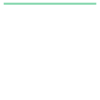

In [12]:
fifth_street

In [13]:
cross_fifth_and_high = fifth_street.intersection(north_high_street)

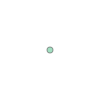

In [14]:
cross_fifth_and_high

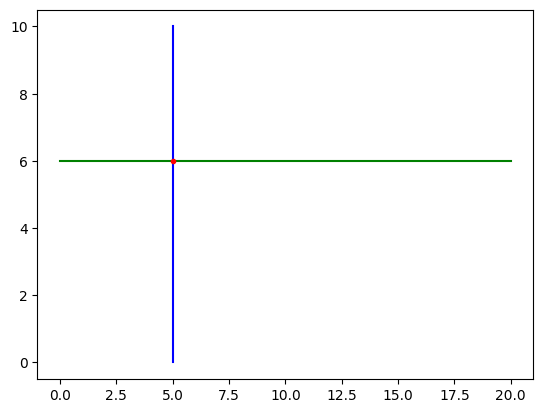

In [15]:
import matplotlib.pyplot as plt
plt.plot(*north_high_street.xy, 'b')
plt.plot(*fifth_street.xy, 'g')
plt.plot(*cross_fifth_and_high.xy, 'r.')

In [16]:
print(north_high_street.contains(cross_fifth_and_high))
print(fifth_street.contains(cross_fifth_and_high))

True
True


### Poligonok (`Poligon`) és műveleteik

In [17]:
from shapely.geometry import Polygon
district = Polygon([(2.5, 2), (0, 8), (10, 8), (10, 2)])

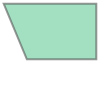

In [18]:
district

In [19]:
print('length = ', district.length)
print('area = ', district.area)

length =  30.0
area =  52.5


## Bevezetés a `Geopandas` könyvtárba

In [21]:
!pip install --upgrade geopandas
import geopandas
import fiona

Requirement already up-to-date: geopandas in /home/zoltan/env/uni/lib/python3.8/site-packages (0.13.0)


### Adatbetöltés

Térbeli adatot tartalmazó fájlok felhasználás szerinti csoportosítása:
- CAD-célú: DWG, DXF, DGN
- GIS-célú: SHP, GPKG, MapInfo File, SQLite, DAT
- Hobby-rekreációs: GPX, KML

Téradat fájl formátumok osztályozása az adat tárolásának módja szerint:
- Bináris fájl: SHP, GPKG, MapInfo File
- Szöveges fájl: GeoJson, KML, GPX, DAT
- Téradatbázis: SQLite

TODO

In [22]:
import fiona
fiona.supported_drivers

{'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'raw',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'raw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'raw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

Töltsük le, majd kicsomagolás után töltsük be a Világtérkép adatokat.

In [24]:
world_borders = geopandas.read_file("data/geo_viz/world_borders.shp")

Támogatott formátumok a `fiona` drivert használva:

### `GeoDataFrames` és `GeoDataSeries`

In [25]:
type(world_borders)

geopandas.geodataframe.GeoDataFrame

In [26]:
world_borders.head()

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,Density,geometry
0,AC,AG,ATG,28,Antigua and Barbuda,550,83039,19,29,-61.783,17.078,151,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,AG,DZ,DZA,12,Algeria,2334790,32854159,2,15,2.632,28.163,14,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,AJ,AZ,AZE,31,Azerbaijan,86147,8352021,142,145,47.395,40.430,97,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,AL,AL,ALB,8,Albania,28729,3153731,150,39,20.068,41.143,110,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,AM,AM,ARM,51,Armenia,29774,3017661,142,145,44.563,40.534,101,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."


In [27]:
type(world_borders)

geopandas.geodataframe.GeoDataFrame

In [28]:
world_borders.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [29]:
world_borders.columns

Index(['FIPS', 'ISO2', 'ISO3', 'UN', 'NAME', 'AREA', 'POP2005', 'REGION',
       'SUBREGION', 'LON', 'LAT', 'Density', 'geometry'],
      dtype='object')

In [30]:
print(type(world_borders.iloc[:, 12]))
print(type(world_borders.geometry))

<class 'geopandas.geoseries.GeoSeries'>
<class 'geopandas.geoseries.GeoSeries'>


In [31]:
country_names = list(world_borders["NAME"])

In [32]:
print("Hungary" in country_names)
print("Holy Roman Empire" in country_names)

True
False


In [33]:
hungary_df = world_borders[world_borders["NAME"] == "Hungary"]

In [34]:
hungary_shp = hungary_df.geometry.iloc[0]
type(hungary_shp)

shapely.geometry.polygon.Polygon

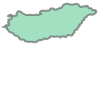

In [35]:
hungary_shp

### Egyszerű vizualizáció

<Axes: >

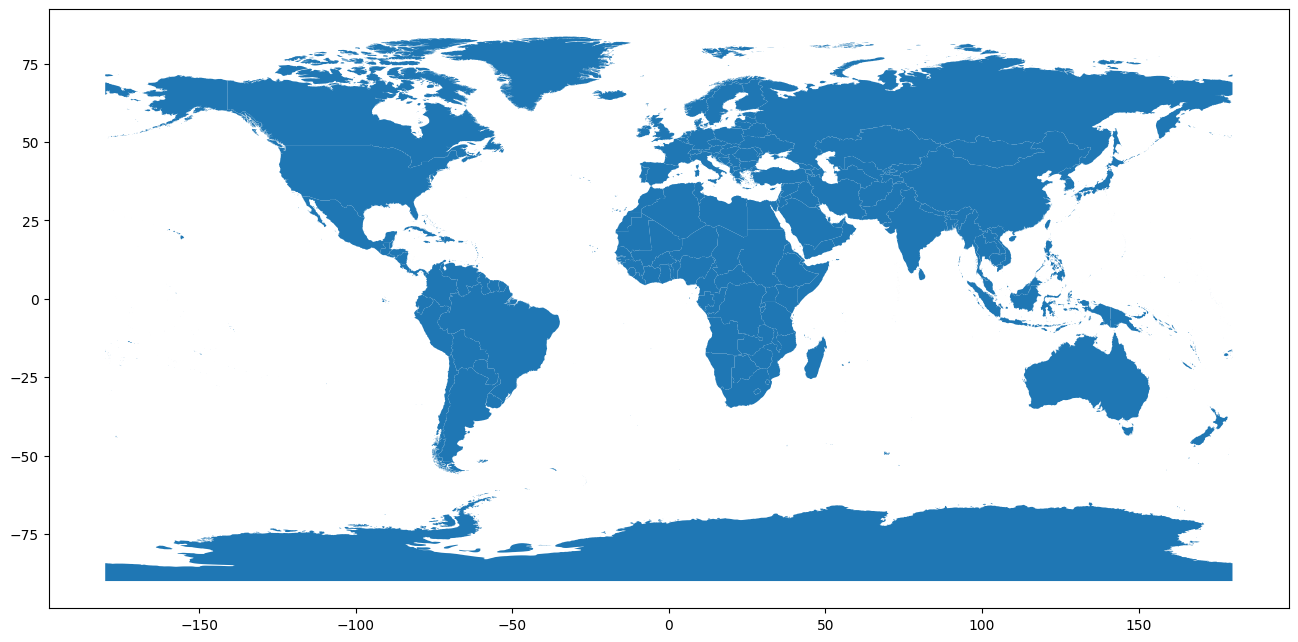

In [36]:
world_borders.plot(figsize=(16, 9))

(45.248329, 49.07666)

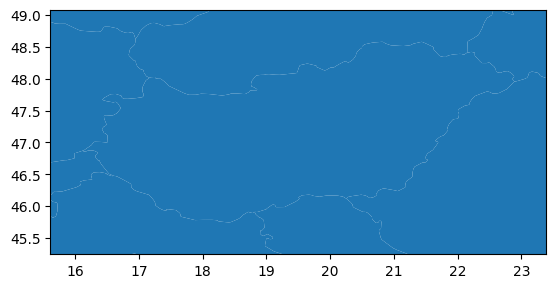

In [37]:
minx, miny, maxx, maxy = hungary_df.total_bounds

ax = world_borders.plot()
ax.set_xlim(minx-0.5, maxx+0.5)
ax.set_ylim(miny-0.5, maxy+0.5)

In [38]:
def zoom_to_hun(ax, buffer=0.5):
  minx, miny, maxx, maxy = hungary_df.total_bounds
  ax.set_xlim(minx-buffer, maxx+buffer)
  ax.set_ylim(miny-buffer, maxy+buffer)

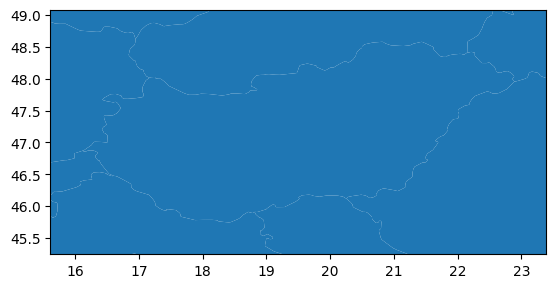

In [39]:
ax = world_borders.plot()
zoom_to_hun(ax)

### Leíró adatok

Olvassunk ki leíró adatokat az országokról a korábban bemutatott elem azonosítás
opcióval. Nézzük meg mennyi volt Görögország népessége 2005-ben?

In [40]:
world_borders.columns

Index(['FIPS', 'ISO2', 'ISO3', 'UN', 'NAME', 'AREA', 'POP2005', 'REGION',
       'SUBREGION', 'LON', 'LAT', 'Density', 'geometry'],
      dtype='object')

In [41]:
# POP2005
world_borders[world_borders['NAME'] == "Greece"]["POP2005"]

73    11099737
Name: POP2005, dtype: int64

Rendezzük az országokat terület szerint növekvő sorrendbe.

In [42]:
world_borders.sort_values(by=['AREA']).head()

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,Density,geometry
238,VT,VA,VAT,336,Holy See (Vatican City),1,783,150,39,12.451,41.904,783,"POLYGON ((12.44509 41.90312, 12.45165 41.90799..."
136,MC,MO,MAC,446,Macau,7,47309,142,30,113.545,22.200,6758,"POLYGON ((113.53166 22.19474, 113.53137 22.201..."
133,GI,GI,GIB,292,Gibraltar,8,291,150,39,-5.345,36.138,36,"POLYGON ((-5.33451 36.16256, -5.33755 36.14944..."
137,MN,MC,MCO,492,Monaco,13,325,150,155,7.412,43.750,25,"POLYGON ((7.43929 43.75752, 7.42305 43.74000, ..."
196,TL,TK,TKL,772,Tokelau,21,1401,9,61,-171.853,-9.193,67,"MULTIPOLYGON (((-171.21472 -9.37750, -171.2191..."


In [43]:
print(list(world_borders.sort_values(by=['AREA'])["NAME"]))

['Holy See (Vatican City)', 'Macau', 'Gibraltar', 'Monaco', 'Tokelau', 'Cocos (Keeling) Islands', 'Nauru', 'Bermuda', 'United States Minor Outlying Islands', 'Norfolk Island', 'Tuvalu', 'Pitcairn Islands', 'Saint Barthelemy', 'Saint Martin', 'Bouvet Island', 'San Marino', 'Guernsey', 'Anguilla', 'British Indian Ocean Territory', 'Montserrat', 'Jersey', 'Christmas Island', 'Marshall Islands', 'Maldives', 'British Virgin Islands', 'Wallis and Futuna Islands', 'Liechtenstein', 'Aruba', 'American Samoa', 'Cook Islands', 'Niue', 'Saint Pierre and Miquelon', 'Saint Kitts and Nevis', 'Cayman Islands', 'United States Virgin Islands', 'Malta', 'Saint Vincent and the Grenadines', 'Heard Island and McDonald Islands', 'Saint Helena', 'Grenada', 'Turks and Caicos Islands', 'Barbados', 'Mayotte', 'Andorra', 'Palau', 'Seychelles', 'Antigua and Barbuda', 'Singapore', 'Guam', 'Isle of Man', 'Northern Mariana Islands', 'Saint Lucia', 'Bahrain', 'Dominica', 'Micronesia, Federated States of', 'Tonga', 'Ål

Új attribútum mező levezetése: Az egyes országok népsűrűséget akár, mint leíró adatot is kiszámíhatjuk.

In [44]:
world_borders['density'] = world_borders['POP2005'] / world_borders['AREA']  

Olvassuk ki várhatóan hány fő tartózkodott egy négyzetkilométeren Magyarországon 2005-ben?

In [45]:
world_borders[world_borders["NAME"] == "Hungary"]['density']

80    108.578363
Name: density, dtype: float64

### Bonyolultabb vizualizáció a világtérképen

Színezzük véletlenszerűen az országokat!

In [46]:
from matplotlib.colors import to_rgba
import numpy as np

# convert 3 random 0-1 number to color
to_rgba(np.random.rand(3))

(0.4360776526124569, 0.9127259852918785, 0.24578420819549818, 1)

<Axes: >

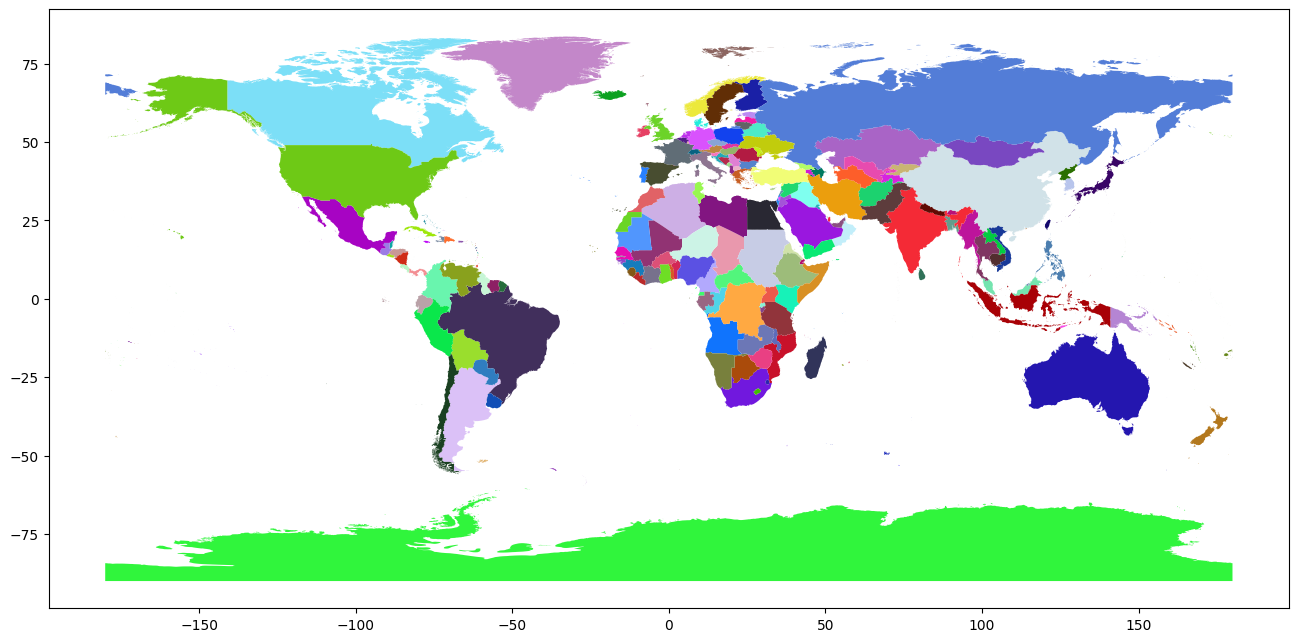

In [47]:
country_colors = [to_rgba(np.random.rand(3)) for i in range(len(world_borders))]
world_borders['color'] = country_colors
world_borders.plot(color=world_borders['color'], figsize=(16, 9))

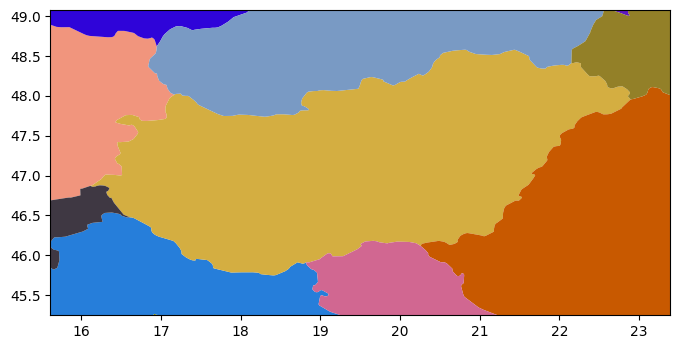

In [48]:
world_borders['color'] = world_borders.apply(lambda row: to_rgba(np.random.rand(3)), axis=1)
ax = world_borders.plot(color = world_borders['color'], figsize=(8, 4))
zoom_to_hun(ax)

Feliratozzuk az országok a neveikkel:

In [49]:
world_borders['anchor'] = world_borders['geometry'].apply(lambda x: x.representative_point().coords[:])
world_borders['anchor'] = [coords[0] for coords in world_borders['anchor']]

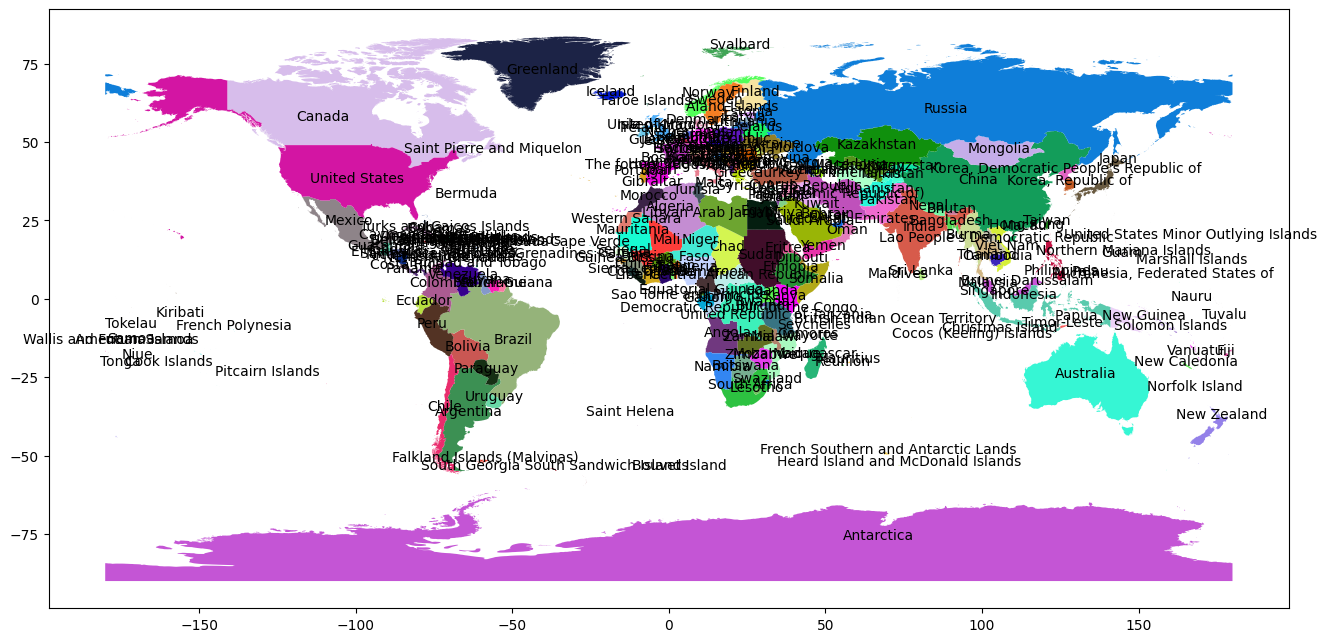

In [50]:
ax = world_borders.plot(color=world_borders['color'], figsize=(16, 9))
#zoom_to_hun(ax)
for idx, row in world_borders.iterrows():
    ax.annotate(text=row['NAME'], xy=row['anchor'], horizontalalignment='center')

Jelenítsük meg az országokat népességük alapján 5 egyenlő számosságú osztályba sorolva.

In [51]:
import pandas as pd
#cats = pd.cut(world_borders.POP2005, 5) # bins with equal length not equal sized bins 
categories_column, bins = pd.qcut(world_borders.POP2005, 5, retbins=True, duplicates='drop')

In [52]:
categories_column

0            (67827.0, 1067285.0]
1      (18642586.0, 1312978855.0]
2         (5416945.0, 18642586.0]
3          (1067285.0, 5416945.0]
4          (1067285.0, 5416945.0]
                  ...            
241             (-0.001, 67827.0]
242             (-0.001, 67827.0]
243             (-0.001, 67827.0]
244             (-0.001, 67827.0]
245             (-0.001, 67827.0]
Name: POP2005, Length: 246, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 67827.0] < (67827.0, 1067285.0] < (1067285.0, 5416945.0] < (5416945.0, 18642586.0] < (18642586.0, 1312978855.0]]

In [53]:
pop_categories = categories_column.unique()

In [54]:
world_borders[categories_column == pop_categories[0]].head()

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,Density,geometry,density,color,anchor
0,AC,AG,ATG,28,Antigua and Barbuda,550,83039,19,29,-61.783,17.078,151,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...",150.980000,"(0.36989370755571627, 0.48809448326598615, 0.7...","(-61.77846144624214, 17.06541450000003)"
9,BA,BH,BHR,48,Bahrain,657,724788,142,145,50.562,26.019,1103,"MULTIPOLYGON (((50.81249 25.64222, 50.79250 25...",1103.178082,"(0.2845199134341496, 0.548262749827768, 0.5103...","(50.55007111604336, 26.018053000000066)"
10,BB,BB,BRB,52,Barbados,454,291933,19,29,-59.559,13.153,643,"POLYGON ((-59.53306 13.05055, -59.54333 13.067...",643.024229,"(0.6363923258737889, 0.6911641695784232, 0.745...","(-59.57258683669045, 13.197222)"
12,BF,BS,BHS,44,Bahamas,12928,323295,19,29,-78.014,24.628,25,"MULTIPOLYGON (((-73.03723 21.13944, -73.12361 ...",25.007348,"(0.3959423373431108, 0.510186646295013, 0.7041...","(-73.33565591585821, 21.11791400000004)"
14,BH,BZ,BLZ,84,Belize,22391,275546,19,13,-88.602,17.219,12,"MULTIPOLYGON (((-87.80334 17.29417, -87.80917 ...",12.306105,"(0.7470488664582229, 0.8918212071970407, 0.866...","(-88.7216096567985, 17.213470500000057)"


In [55]:
print(len(world_borders) / 5)
print(len(world_borders[categories_column == pop_categories[0]]))
print(len(world_borders[categories_column == pop_categories[4]]))

49.2
49
50


<Axes: >

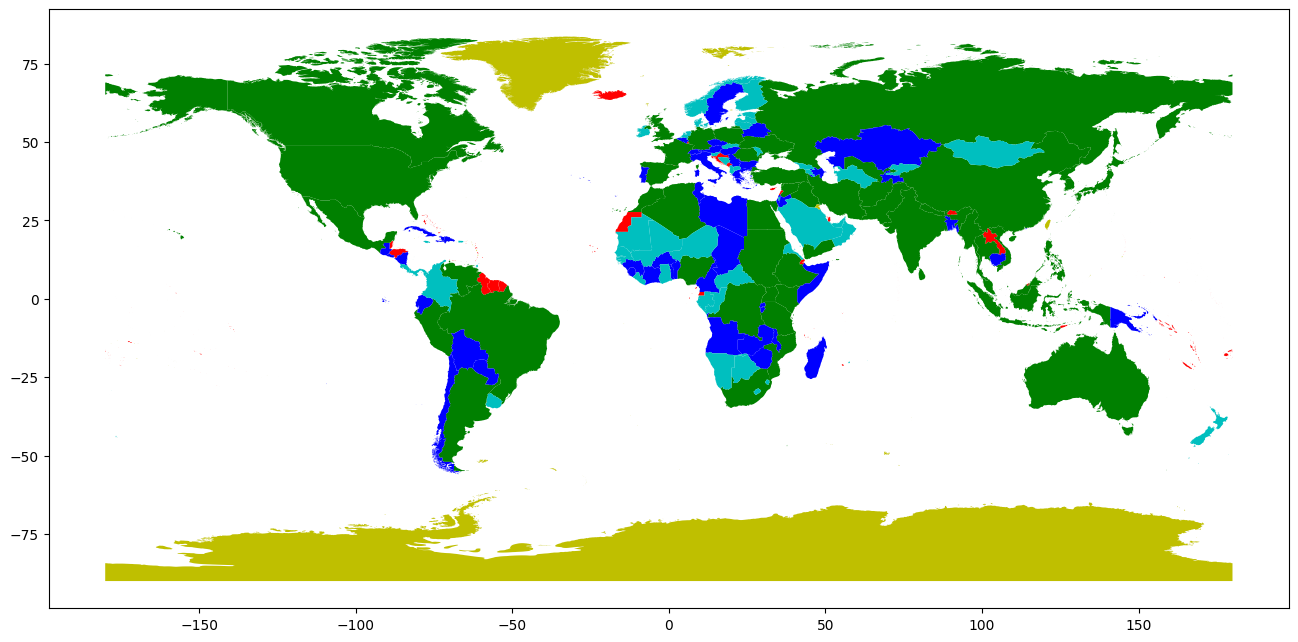

In [56]:
ax = world_borders[categories_column == pop_categories[0]].plot(color='r', figsize=(16, 9))
world_borders[categories_column == pop_categories[1]].plot(ax=ax, color='g')
world_borders[categories_column == pop_categories[2]].plot(ax=ax, color='b')
world_borders[categories_column == pop_categories[3]].plot(ax=ax, color='c')
world_borders[categories_column == pop_categories[4]].plot(ax=ax, color='y')

Vagy használhajtuk a `mapclassify` csomagot, amit viszont telepíteni kell. További információkat [itt](https://dmnfarrell.github.io/plotting/categorical-geopandas-maps) és további példákat [itt](https://nbviewer.org/github/pysal/mapclassify/blob/main/notebooks/03_choropleth.ipynb) lehet találni a csomag használatáról.

In [59]:
!pip install mapclassify

<Axes: >

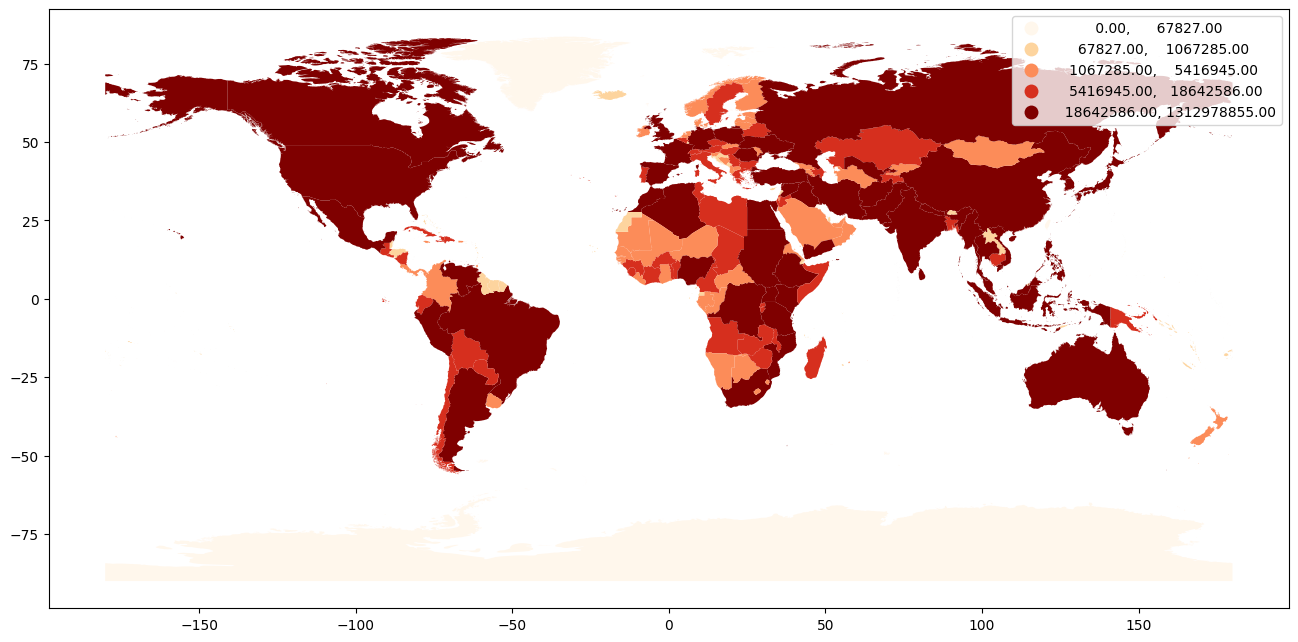

In [60]:
world_borders.plot(column='POP2005', cmap='OrRd', scheme='quantiles', k=5, figsize=(16, 9), legend=True)

### Viágvárosok adat

Töltsük be a Világvárosok vektor réteget, és címkézzük meg a réteg elemeit a városok neveivel. Ezt követően jelenítsük meg csak a fővárosokat:

In [61]:
world_cities = geopandas.read_file("data/geo_viz/cities.shp")

In [62]:
world_cities.columns

Index(['NAME', 'COUNTRY', 'POPULATION', 'CAPITAL', 'geometry'], dtype='object')

<Axes: >

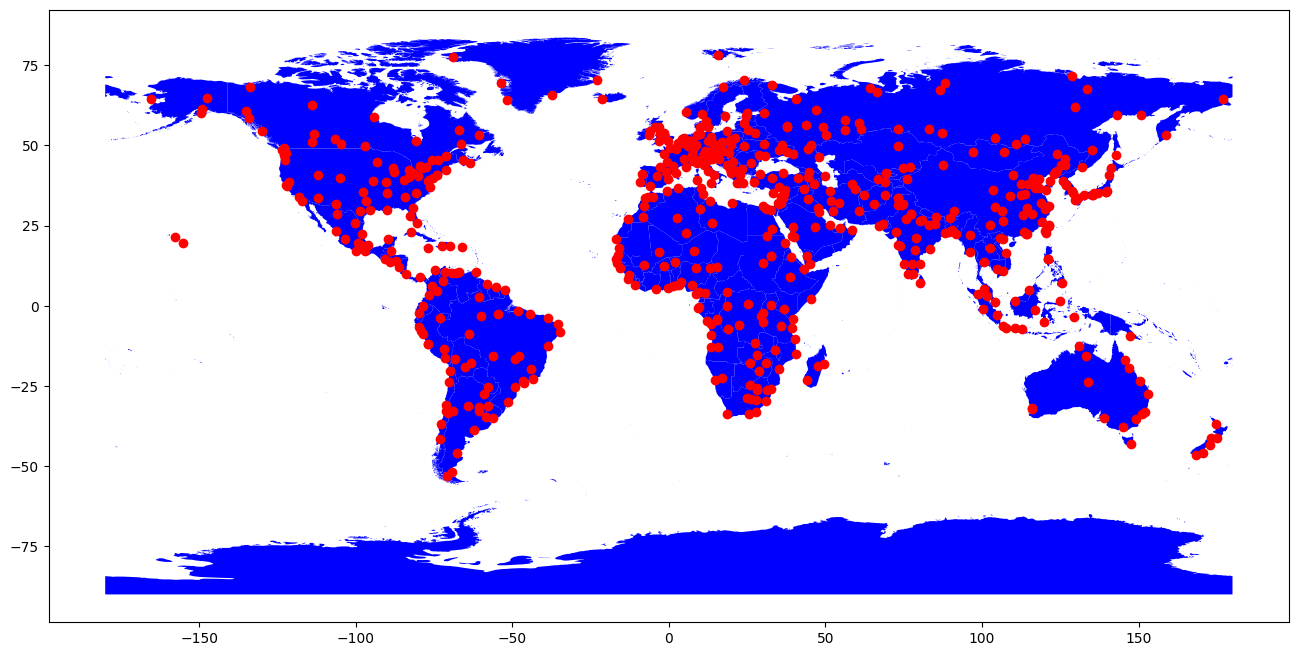

In [63]:
ax = world_borders.plot(color='b', figsize=(16, 9))
world_cities.plot(ax=ax, color='r')

### Térbeli lekérdezés: `contains` és `within`

In [64]:
world_borders["REGION"].unique()

array([ 19,   2, 142, 150,   9,   0])

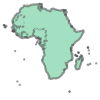

In [65]:
world_borders[world_borders["REGION"] == 2].geometry.unary_union

In [66]:
africa_df = world_borders[world_borders["REGION"] == 2]
africa_shp = africa_df.unary_union

<Axes: >

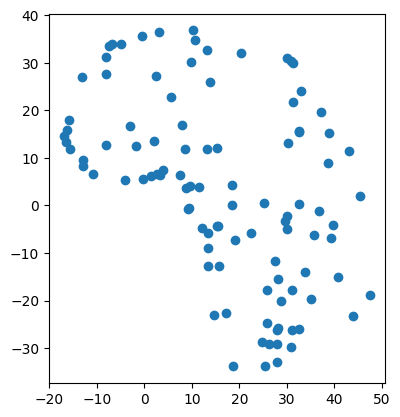

In [67]:
cities_in_africa = world_cities[world_cities.within(africa_shp)]
cities_in_africa.plot()

<Axes: >

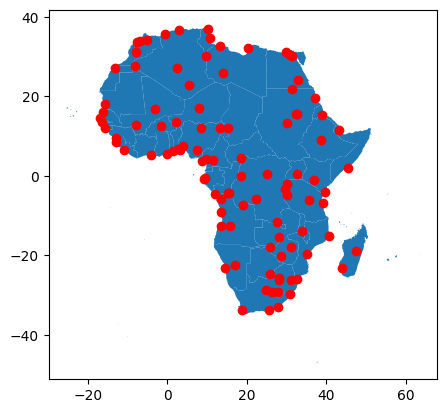

In [68]:
ax = africa_df.plot()
cities_in_africa.plot(ax=ax, c='r')

/home/zoltan/env/uni/lib/python3.8/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Axes: >

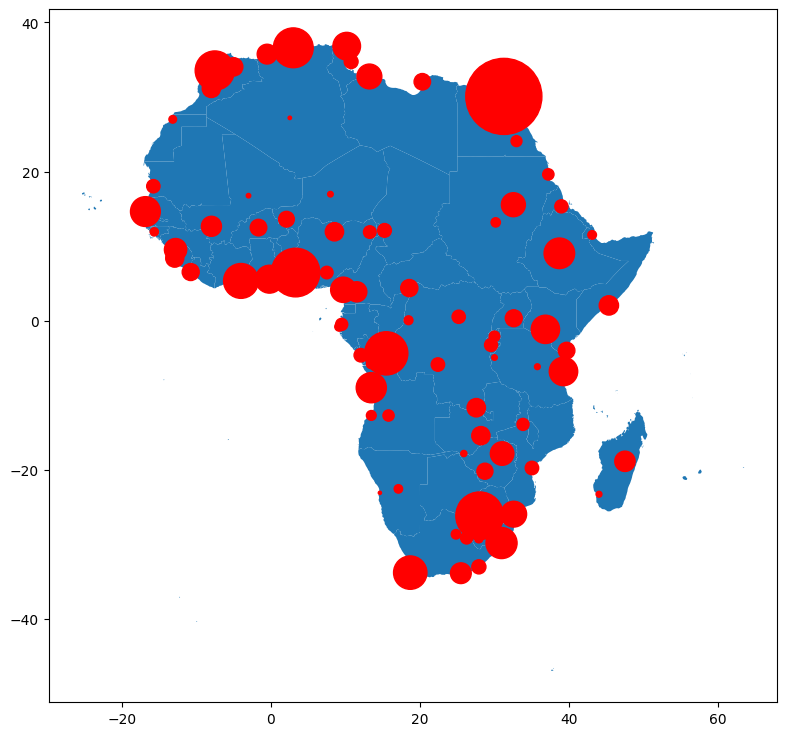

In [69]:
ax = africa_df.plot(figsize=(16,9))
max_val = cities_in_africa['POPULATION'].max()
marker_size = cities_in_africa['POPULATION']/max_val*3000
cities_in_africa.plot(ax=ax, c='r', markersize=marker_size)

### Térbeli lekérdezés: buffer

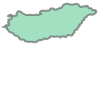

In [70]:
hungary_shp

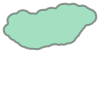

In [71]:
hungary_shp.buffer(0.5)

In [72]:
hungary_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [73]:
print(world_borders.loc[56]["NAME"])

hungary_shp.buffer(0.5).intersects(world_borders.loc[56].geometry)

Austria


True

In [74]:
# Using shapely intersects
idx_df = world_borders.geometry.apply(lambda g: hungary_shp.buffer(0.5).intersects(g))
hungary_neihgbors = world_borders[idx_df]

In [75]:
hungary_neihgbors["NAME"]

56      Austria
79      Croatia
80      Hungary
104    Slovakia
170     Romania
183    Slovenia
207     Ukraine
237      Serbia
Name: NAME, dtype: object

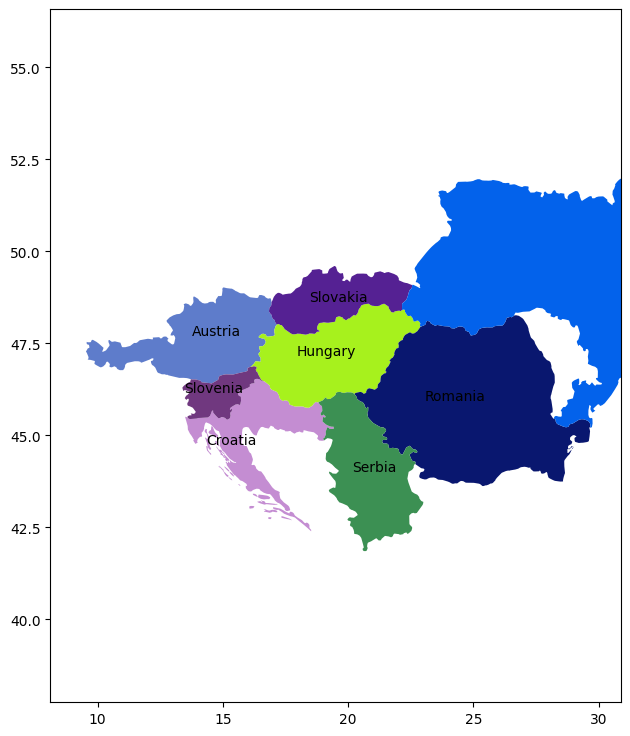

In [76]:
ax = hungary_neihgbors.plot(color=world_borders['color'], figsize=(16, 9))
zoom_to_hun(ax, 8.0)
for idx, row in hungary_neihgbors.iterrows():
    plt.annotate(text=row['NAME'], xy=row['anchor'], horizontalalignment='center')